In [104]:
## https://www.youtube.com/watch?v=JoR5HCs0n0s
##
## Using a simple autoencoder architcture to begin with on the BAT157 mo dataset


In [105]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [126]:
## Big array file
# dir='../../npy-arrays/data-analysis/'
dir = "/home/curtis/programming/projects/astronomical-transient-classifier/data-analysis/npy-arrays/"

##
b157file='aug_rates_labels.npy'

In [133]:
#Reade the array
bat157=np.load(dir+b157file, allow_pickle=True, fix_imports=False)

# images, labels = bat157['image'], bat157['labels']
# images = [np.squeeze(np.asarray((x[0]))) for x in bat157]
labels = [x[1] for x in bat157]

for i in range(len(bat157)):
    if bat157[i][0].shape[1] != 155:
        bat157.delete(i)

images = np.empty([len(bat157), 8, 155])
for i in range(len(bat157)):
    print(bat157[i][0].shape)
    # images[i] = np.squeeze(np.asarray(bat157[i][0]))

# x = np.empty([len(images), 8, 155])
# for i in range(len(images)):
#     x[i] = images[i]

# print(type(x))

AttributeError: 'numpy.ndarray' object has no attribute 'delete'

In [108]:
encoder_input = keras.Input(shape=(8, 155, 1), name='bat')

In [109]:
#flattening the data and creating the bottleneck
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(20, activation="relu")(x)

In [110]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')


In [111]:
decoder_input = keras.layers.Dense(20, activation="relu")(encoder_output)
x = keras.layers.Dense(1240, activation="relu")(decoder_input)  # 1240 is 8*155 features

In [112]:
155*8

1240

In [113]:
decoder_output = keras.layers.Reshape((8, 155, 1))(x)

In [114]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bat (InputLayer)            [(None, 8, 155, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 1240)              0         
                                                                 
 dense_12 (Dense)            (None, 20)                24820     
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 1240)              26040     
                                                                 
 reshape_4 (Reshape)         (None, 8, 155, 1)         0         
                                                                 
Total params: 51,280
Trainable params: 51,280
Non-train

In [115]:
#We'll now compile our model with the optimizer and a loss metric. 
#We'll use mean squared error for loss (mse).
# https://keras.io/api/losses/   for more loss functions
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
autoencoder.compile(opt, loss='mse',)

/usr/local/lib/python3.9/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [116]:
# imgs = np.array(images)
# print(len(images))
# print(imgs.shape)

In [117]:
epochs=5

for epoch in range(epochs):
  history = autoencoder.fit(
    images,
    images,
    epochs=4, 
    batch_size=32, validation_split=0.10
  )   
  autoencoder.save(f"models/AE-{epoch+1}.model")

Epoch 1/4


ValueError: in user code:

    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/input_spec.py", line 199, in assert_input_compatibility
        raise ValueError(f'Layer "{layer_name}" expects {len(input_spec)} input(s),'

    ValueError: Layer "autoencoder" expects 1 input(s), but it received 1815 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 153) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:227' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:228' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:229' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:230' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:231' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:232' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:233' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:234' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:235' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:236' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:237' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:238' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:239' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:240' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:241' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:242' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:243' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:244' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:245' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:246' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:247' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:248' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:249' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:250' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:251' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:252' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:253' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:254' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:255' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:256' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:257' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:258' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:259' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:260' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:261' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:262' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:263' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:264' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:265' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:266' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:267' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:268' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:269' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:270' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:271' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:272' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:273' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:274' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:275' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:276' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:277' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:278' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:279' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:280' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:281' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:282' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:283' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:284' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:285' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:286' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:287' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:288' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:289' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:290' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:291' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:292' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:293' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:294' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:295' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:296' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:297' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:298' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:299' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:300' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:301' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:302' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:303' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:304' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:305' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:306' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:307' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:308' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:309' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:310' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:311' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:312' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:313' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:314' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:315' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:316' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:317' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:318' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:319' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:320' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:321' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:322' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:323' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:324' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:325' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:326' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:327' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:328' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:329' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:330' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:331' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:332' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:333' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:334' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:335' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:336' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:337' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:338' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:339' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:340' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:341' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:342' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:343' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:344' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:345' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:346' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:347' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:348' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:349' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:350' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:351' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:352' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:353' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:354' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:355' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:356' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:357' shape=(None, 154) dtype=float32>, <tf.Tensor 'IteratorGetNext:358' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:359' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:360' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:361' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:362' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:363' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:364' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:365' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:366' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:367' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:368' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:369' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:370' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:371' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:372' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:373' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:374' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:375' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:376' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:377' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:378' shape=(None, 152) dtype=float32>, <tf.Tensor 'IteratorGetNext:379' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:380' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:381' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:382' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:383' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:384' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:385' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:386' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:387' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:388' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:389' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:390' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:391' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:392' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:393' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:394' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:395' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:396' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:397' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:398' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:399' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:400' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:401' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:402' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:403' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:404' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:405' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:406' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:407' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:408' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:409' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:410' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:411' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:412' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:413' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:414' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:415' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:416' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:417' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:418' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:419' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:420' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:421' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:422' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:423' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:424' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:425' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:426' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:427' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:428' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:429' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:430' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:431' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:432' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:433' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:434' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:435' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:436' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:437' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:438' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:439' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:440' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:441' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:442' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:443' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:444' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:445' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:446' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:447' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:448' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:449' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:450' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:451' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:452' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:453' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:454' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:455' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:456' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:457' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:458' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:459' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:460' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:461' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:462' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:463' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:464' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:465' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:466' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:467' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:468' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:469' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:470' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:471' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:472' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:473' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:474' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:475' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:476' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:477' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:478' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:479' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:480' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:481' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:482' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:483' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:484' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:485' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:486' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:487' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:488' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:489' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:490' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:491' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:492' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:493' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:494' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:495' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:496' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:497' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:498' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:499' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:500' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:501' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:502' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:503' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:504' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:505' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:506' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:507' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:508' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:509' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:510' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:511' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:512' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:513' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:514' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:515' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:516' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:517' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:518' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:519' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:520' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:521' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:522' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:523' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:524' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:525' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:526' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:527' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:528' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:529' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:530' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:531' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:532' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:533' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:534' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:535' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:536' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:537' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:538' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:539' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:540' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:541' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:542' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:543' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:544' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:545' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:546' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:547' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:548' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:549' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:550' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:551' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:552' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:553' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:554' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:555' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:556' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:557' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:558' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:559' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:560' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:561' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:562' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:563' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:564' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:565' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:566' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:567' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:568' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:569' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:570' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:571' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:572' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:573' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:574' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:575' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:576' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:577' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:578' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:579' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:580' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:581' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:582' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:583' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:584' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:585' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:586' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:587' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:588' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:589' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:590' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:591' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:592' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:593' shape=(None, 153) dtype=float32>, <tf.Tensor 'IteratorGetNext:594' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:595' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:596' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:597' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:598' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:599' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:600' shape=(None, 153) dtype=float32>, <tf.Tensor 'IteratorGetNext:601' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:602' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:603' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:604' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:605' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:606' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:607' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:608' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:609' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:610' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:611' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:612' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:613' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:614' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:615' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:616' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:617' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:618' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:619' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:620' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:621' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:622' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:623' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:624' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:625' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:626' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:627' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:628' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:629' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:630' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:631' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:632' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:633' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:634' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:635' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:636' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:637' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:638' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:639' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:640' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:641' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:642' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:643' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:644' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:645' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:646' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:647' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:648' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:649' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:650' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:651' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:652' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:653' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:654' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:655' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:656' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:657' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:658' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:659' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:660' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:661' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:662' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:663' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:664' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:665' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:666' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:667' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:668' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:669' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:670' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:671' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:672' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:673' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:674' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:675' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:676' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:677' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:678' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:679' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:680' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:681' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:682' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:683' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:684' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:685' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:686' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:687' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:688' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:689' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:690' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:691' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:692' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:693' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:694' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:695' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:696' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:697' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:698' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:699' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:700' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:701' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:702' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:703' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:704' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:705' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:706' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:707' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:708' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:709' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:710' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:711' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:712' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:713' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:714' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:715' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:716' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:717' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:718' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:719' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:720' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:721' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:722' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:723' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:724' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:725' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:726' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:727' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:728' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:729' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:730' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:731' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:732' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:733' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:734' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:735' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:736' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:737' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:738' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:739' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:740' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:741' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:742' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:743' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:744' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:745' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:746' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:747' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:748' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:749' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:750' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:751' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:752' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:753' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:754' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:755' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:756' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:757' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:758' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:759' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:760' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:761' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:762' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:763' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:764' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:765' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:766' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:767' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:768' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:769' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:770' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:771' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:772' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:773' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:774' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:775' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:776' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:777' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:778' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:779' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:780' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:781' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:782' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:783' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:784' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:785' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:786' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:787' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:788' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:789' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:790' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:791' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:792' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:793' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:794' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:795' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:796' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:797' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:798' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:799' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:800' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:801' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:802' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:803' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:804' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:805' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:806' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:807' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:808' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:809' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:810' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:811' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:812' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:813' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:814' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:815' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:816' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:817' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:818' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:819' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:820' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:821' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:822' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:823' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:824' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:825' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:826' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:827' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:828' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:829' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:830' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:831' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:832' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:833' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:834' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:835' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:836' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:837' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:838' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:839' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:840' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:841' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:842' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:843' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:844' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:845' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:846' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:847' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:848' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:849' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:850' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:851' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:852' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:853' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:854' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:855' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:856' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:857' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:858' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:859' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:860' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:861' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:862' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:863' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:864' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:865' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:866' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:867' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:868' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:869' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:870' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:871' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:872' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:873' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:874' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:875' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:876' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:877' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:878' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:879' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:880' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:881' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:882' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:883' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:884' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:885' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:886' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:887' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:888' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:889' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:890' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:891' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:892' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:893' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:894' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:895' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:896' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:897' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:898' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:899' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:900' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:901' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:902' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:903' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:904' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:905' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:906' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:907' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:908' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:909' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:910' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:911' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:912' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:913' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:914' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:915' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:916' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:917' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:918' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:919' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:920' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:921' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:922' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:923' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:924' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:925' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:926' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:927' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:928' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:929' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:930' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:931' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:932' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:933' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:934' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:935' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:936' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:937' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:938' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:939' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:940' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:941' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:942' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:943' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:944' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:945' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:946' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:947' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:948' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:949' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:950' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:951' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:952' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:953' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:954' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:955' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:956' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:957' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:958' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:959' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:960' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:961' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:962' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:963' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:964' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:965' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:966' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:967' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:968' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:969' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:970' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:971' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:972' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:973' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:974' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:975' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:976' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:977' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:978' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:979' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:980' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:981' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:982' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:983' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:984' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:985' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:986' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:987' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:988' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:989' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:990' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:991' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:992' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:993' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:994' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:995' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:996' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:997' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:998' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:999' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1000' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1001' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1002' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1003' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1004' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1005' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1006' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1007' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1008' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1009' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1010' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1011' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1012' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1013' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1014' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1015' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1016' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1017' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1018' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1019' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1020' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1021' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1022' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1023' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1024' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1025' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1026' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1027' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1028' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1029' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1030' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1031' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1032' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1033' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1034' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1035' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1036' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1037' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1038' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1039' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1040' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1041' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1042' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1043' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1044' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1045' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1046' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1047' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1048' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1049' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1050' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1051' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1052' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1053' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1054' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1055' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1056' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1057' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1058' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1059' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1060' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1061' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1062' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1063' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1064' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1065' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1066' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1067' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1068' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1069' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1070' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1071' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1072' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1073' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1074' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1075' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1076' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1077' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1078' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1079' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1080' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1081' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1082' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1083' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1084' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1085' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1086' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1087' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1088' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1089' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1090' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1091' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1092' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1093' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1094' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1095' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1096' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1097' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1098' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1099' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1100' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1101' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1102' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1103' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1104' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1105' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1106' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1107' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1108' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1109' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1110' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1111' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1112' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1113' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1114' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1115' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1116' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1117' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1118' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1119' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1120' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1121' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1122' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1123' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1124' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1125' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1126' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1127' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1128' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1129' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1130' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1131' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1132' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1133' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1134' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1135' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1136' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1137' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1138' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1139' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1140' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1141' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1142' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1143' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1144' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1145' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1146' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1147' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1148' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1149' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1150' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1151' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1152' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1153' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1154' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1155' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1156' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1157' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1158' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1159' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1160' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1161' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1162' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1163' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1164' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1165' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1166' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1167' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1168' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1169' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1170' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1171' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1172' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1173' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1174' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1175' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1176' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1177' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1178' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1179' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1180' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1181' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1182' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1183' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1184' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1185' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1186' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1187' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1188' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1189' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1190' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1191' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1192' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1193' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1194' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1195' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1196' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1197' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1198' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1199' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1200' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1201' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1202' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1203' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1204' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1205' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1206' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1207' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1208' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1209' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1210' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1211' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1212' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1213' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1214' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1215' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1216' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1217' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1218' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1219' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1220' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1221' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1222' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1223' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1224' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1225' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1226' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1227' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1228' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1229' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1230' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1231' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1232' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1233' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1234' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1235' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1236' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1237' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1238' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1239' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1240' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1241' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1242' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1243' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1244' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1245' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1246' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1247' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1248' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1249' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1250' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1251' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1252' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1253' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1254' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1255' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1256' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1257' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1258' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1259' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1260' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1261' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1262' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1263' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1264' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1265' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1266' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1267' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1268' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1269' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1270' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1271' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1272' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1273' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1274' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1275' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1276' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1277' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1278' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1279' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1280' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1281' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1282' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1283' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1284' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1285' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1286' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1287' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1288' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1289' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1290' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1291' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1292' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1293' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1294' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1295' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1296' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1297' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1298' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1299' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1300' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1301' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1302' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1303' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1304' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1305' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1306' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1307' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1308' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1309' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1310' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1311' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1312' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1313' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1314' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1315' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1316' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1317' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1318' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1319' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1320' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1321' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1322' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1323' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1324' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1325' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1326' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1327' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1328' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1329' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1330' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1331' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1332' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1333' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1334' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1335' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1336' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1337' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1338' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1339' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1340' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1341' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1342' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1343' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1344' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1345' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1346' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1347' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1348' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1349' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1350' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1351' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1352' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1353' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1354' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1355' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1356' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1357' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1358' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1359' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1360' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1361' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1362' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1363' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1364' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1365' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1366' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1367' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1368' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1369' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1370' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1371' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1372' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1373' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1374' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1375' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1376' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1377' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1378' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1379' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1380' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1381' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1382' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1383' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1384' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1385' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1386' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1387' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1388' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1389' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1390' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1391' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1392' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1393' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1394' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1395' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1396' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1397' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1398' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1399' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1400' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1401' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1402' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1403' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1404' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1405' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1406' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1407' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1408' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1409' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1410' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1411' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1412' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1413' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1414' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1415' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1416' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1417' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1418' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1419' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1420' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1421' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1422' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1423' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1424' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1425' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1426' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1427' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1428' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1429' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1430' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1431' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1432' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1433' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1434' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1435' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1436' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1437' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1438' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1439' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1440' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1441' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1442' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1443' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1444' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1445' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1446' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1447' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1448' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1449' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1450' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1451' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1452' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1453' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1454' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1455' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1456' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1457' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1458' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1459' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1460' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1461' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1462' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1463' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1464' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1465' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1466' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1467' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1468' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1469' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1470' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1471' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1472' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1473' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1474' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1475' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1476' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1477' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1478' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1479' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1480' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1481' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1482' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1483' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1484' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1485' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1486' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1487' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1488' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1489' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1490' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1491' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1492' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1493' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1494' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1495' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1496' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1497' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1498' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1499' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1500' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1501' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1502' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1503' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1504' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1505' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1506' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1507' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1508' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1509' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1510' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1511' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1512' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1513' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1514' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1515' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1516' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1517' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1518' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1519' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1520' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1521' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1522' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1523' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1524' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1525' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1526' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1527' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1528' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1529' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1530' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1531' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1532' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1533' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1534' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1535' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1536' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1537' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1538' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1539' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1540' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1541' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1542' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1543' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1544' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1545' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1546' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1547' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1548' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1549' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1550' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1551' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1552' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1553' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1554' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1555' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1556' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1557' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1558' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1559' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1560' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1561' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1562' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1563' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1564' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1565' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1566' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1567' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1568' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1569' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1570' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1571' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1572' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1573' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1574' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1575' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1576' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1577' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1578' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1579' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1580' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1581' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1582' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1583' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1584' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1585' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1586' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1587' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1588' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1589' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1590' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1591' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1592' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1593' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1594' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1595' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1596' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1597' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1598' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1599' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1600' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1601' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1602' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1603' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1604' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1605' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1606' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1607' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1608' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1609' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1610' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1611' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1612' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1613' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1614' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1615' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1616' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1617' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1618' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1619' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1620' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1621' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1622' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1623' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1624' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1625' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1626' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1627' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1628' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1629' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1630' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1631' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1632' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1633' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1634' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1635' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1636' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1637' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1638' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1639' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1640' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1641' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1642' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1643' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1644' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1645' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1646' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1647' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1648' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1649' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1650' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1651' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1652' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1653' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1654' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1655' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1656' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1657' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1658' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1659' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1660' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1661' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1662' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1663' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1664' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1665' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1666' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1667' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1668' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1669' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1670' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1671' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1672' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1673' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1674' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1675' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1676' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1677' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1678' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1679' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1680' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1681' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1682' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1683' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1684' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1685' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1686' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1687' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1688' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1689' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1690' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1691' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1692' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1693' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1694' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1695' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1696' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1697' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1698' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1699' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1700' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1701' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1702' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1703' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1704' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1705' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1706' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1707' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1708' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1709' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1710' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1711' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1712' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1713' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1714' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1715' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1716' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1717' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1718' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1719' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1720' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1721' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1722' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1723' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1724' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1725' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1726' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1727' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1728' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1729' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1730' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1731' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1732' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1733' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1734' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1735' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1736' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1737' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1738' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1739' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1740' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1741' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1742' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1743' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1744' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1745' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1746' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1747' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1748' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1749' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1750' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1751' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1752' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1753' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1754' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1755' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1756' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1757' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1758' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1759' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1760' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1761' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1762' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1763' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1764' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1765' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1766' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1767' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1768' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1769' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1770' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1771' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1772' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1773' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1774' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1775' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1776' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1777' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1778' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1779' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1780' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1781' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1782' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1783' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1784' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1785' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1786' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1787' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1788' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1789' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1790' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1791' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1792' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1793' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1794' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1795' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1796' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1797' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1798' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1799' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1800' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1801' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1802' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1803' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1804' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1805' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1806' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1807' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1808' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1809' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1810' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1811' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1812' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1813' shape=(None, 155) dtype=float32>, <tf.Tensor 'IteratorGetNext:1814' shape=(None, 155) dtype=float32>]


In [ ]:
# print(history.history.keys())

In [ ]:
# First, let's look at an encoded example, because it's cool:
example = encoder.predict([images[0].reshape(-1, 8, 155, 1)] )
print(example.shape)

ValueError: in user code:

    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "encoder" is incompatible with the layer: expected shape=(None, 8, 155, 1), found shape=(None, 155)


(50,)
[0.03825222 0.         0.05131484 0.         0.         0.
 0.         0.         0.04366006 0.01554061 0.         0.
 0.         0.06293763 0.02478426 0.         0.04863582 0.
 0.         0.         0.37470555 0.03252885 0.         0.
 0.         0.         0.03096338 0.         0.         0.
 0.         0.         0.04247659 0.         0.03688449 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00914979]


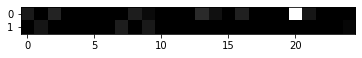

In [ ]:
print(example[0].shape)
print(example[0])
plt.imshow(example[0].reshape((2,25)), cmap="gray")

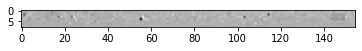

In [ ]:
#That object was:
plt.imshow(images[0]*0.0487, cmap="gray")

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


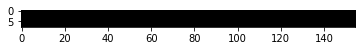

In [ ]:
# AFTER THE AUTOENCODER IT WAS:
ae_out = autoencoder.predict([ images[1].reshape(-1, 8, 155, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0]/0.0487, cmap="gray")
print(ae_out[0])

In [ ]:
#Using OpenCV, we can quickly cycle through a bunch of 
#examples by doing:

for d in images[:5]:  # just show 5 examples, feel free to show all or however many you want!

    ae_out = autoencoder.predict([ d.reshape(-1, 8, 155, 1) ])
    img = ae_out[0]

    cv2.imshow("decoded",img )
    cv2.imshow("original",np.array(d))
    cv2.waitKey(1000)  # wait 1000ms, 1 second, and then show the next.

In [ ]:
## Following the suggestion of Peter Harrington:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# prepare the predicted images from the encoder portion
X=[]

for im in images:
    val=encoder.predict(im.reshape(-1, 8, 155, 1) )
    #print(val.shape)
    X.append(val[0])

In [ ]:
print(np.array(X[0:2]))


[[0.         0.         0.07632875 0.         0.         0.
  0.         0.         0.07497109 0.15977375 0.         0.
  0.         0.21994528 0.         0.         0.08159518 0.
  0.         0.         0.35699314 0.04200723 0.         0.
  0.         0.         0.00399086 0.         0.         0.
  0.         0.05970611 0.01959756 0.         0.02944804 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.0761209  0.         0.         0.
  0.         0.         0.07511173 0.16012155 0.         0.
  0.         0.21992758 0.         0.         0.08120699 0.
  0.         0.         0.3569238  0.04217125 0.         0.
  0.         0.         0.00393685 0.         0.         0.
  0.         0.05955221 0.01926135 0.         0.02957396 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), labels, test_size=0.3)
print(X_train.shape)

(10822, 50)


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
print(neigh.predict([X_test[3]]))
print(y_test[1:10])

[1]
[ 1  1  1  2 20  1  1  1 25]
